In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import soundfile as sf
import librosa

import os 

In [3]:
path_test = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test'
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train'
path_Y = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/Y_train_ofTdMHi.csv'

Le Format .WAV  qui signifie Waveform Audio File Format, est un format de fichier audio standard pour le stockage de l'audio en format brut, sans compression. Cela signifie qu'il offre une qualité sonore élevée, mais prend plus d'espace de stockage comparé à d'autres formats comme MP3.

# Découverte des données

/home/ibotcazou/.local/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


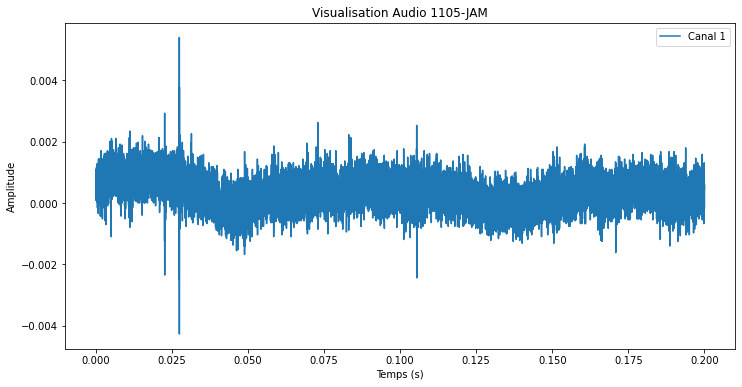

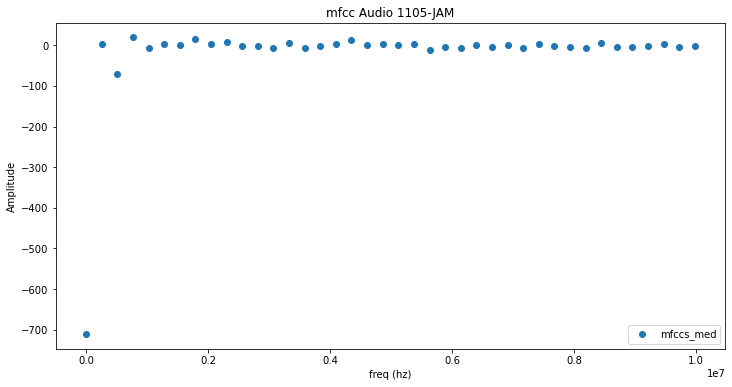

[51200, 256000, array([0.00552368, 0.00543213, 0.00515747, ..., 0.00402832, 0.00421143,
       0.00436401]), array([-7.00778749e+02,  3.50397629e+01, -4.60280416e+01,  2.91664677e+01,
        1.76945798e-01,  8.30656780e+00,  8.66672401e+00,  2.12979023e+01,
        6.94540837e+00,  9.15036649e+00,  3.58917906e+00,  4.90515358e+00,
       -4.08037276e+00,  3.86793794e+00, -1.86110657e+00,  6.04562326e+00,
        4.31539505e+00,  1.18551727e+01,  6.36358893e+00,  1.07450395e+01,
        2.86858184e+00,  4.50666528e+00, -5.67147554e-01,  1.57784762e+00,
       -3.16849523e+00,  1.20972021e+00, -3.29028272e+00,  2.16754650e+00,
       -2.60215642e+00,  1.18243484e+00, -2.74956554e+00,  1.58548927e+00,
       -4.45838660e+00,  5.95320566e-01, -5.35371597e+00, -9.61648259e-01,
       -3.04948250e+00, -1.03269524e+00, -3.30466665e+00, -1.74255199e+00])]


In [34]:
def visual(path,display=True):
    # Ouvrir le fichier WAV en mode lecture
    if path.endswith(".wav"):
        
        # Obtenir des informations de base le vecteur audio et la fréquence d'échantillonnage
        audio, sample_rate = sf.read(path) 
        n_frames = audio.shape[0] # donne le nb d'echantillon
        duration = n_frames/sample_rate # en sec

        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) #Permet d'avoir les éléments caractéristiques d'un son par la transformée de Fourier discrète
        mfccs_med = np.median(mfccs.T, axis=0) #prend la médiane de chaque mfcc sur les sous partitions de l'audio 

        # Créer le temps (axe x)
        time = np.linspace(0,duration, num=n_frames)
        freq = sample_rate*np.arange(40)
        if display:
            # Affichage
            plt.figure(figsize=(12, 6))
            plt.plot(time, audio, label="Canal 1")
            plt.title(f"Visualisation Audio {path[110:-4]}")
            plt.xlabel("Temps (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.show()
            
            plt.figure(figsize=(12, 6))
            plt.scatter(freq, mfccs_med, label="mfccs_med")
            plt.title(f"mfcc Audio {path[110:-4]}")
            plt.xlabel("freq (hz)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.show()

        return n_frames, sample_rate, audio,mfccs,mfccs_med
    else:
        print("Le fichier suivant n'est pas au format .wav",path)

n_frames, sample_rate, audio,mfccs,mfccs_med = visual(path+'/01105-JAM.wav')
print(l)

## tester l'homogénéité des données

In [36]:
dico1 = {}
for ech in os.listdir(path):
    dico1[f"{ech}"] = visual(os.path.join(path,ech),display=False)
    if dico1[f"{ech}"] == None:
        dico1.pop(f"{ech}")



/home/ibotcazou/.local/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train/.DS_Store


In [39]:
for key in dico1.keys():
    c=0
    if (dico1[str(key)][0]!=51200) | (dico1[str(key)][1]!=256000):
        print(key)
        c+=1
print(f"Il y a {c} fichiers non conformes")

Il y a 0 fichiers non conformes


## Ajout de la variable target sur un quart des données


In [40]:
Y_train = pd.read_csv(path_Y)
f = lambda x:x[6:-4]
Y_train['loc'] = Y_train['id'].apply(f)
Y_train

,id,pos_label,loc
0,00000-JAM.wav,0.0,JAM
1,00001-JAM.wav,1.0,JAM
2,00002-JAM.wav,1.0,JAM
3,00003-JAM.wav,1.0,JAM
4,00004-JAM.wav,1.0,JAM
...,...,...,...
23163,23163-StMARTIN.wav,0.0,StMARTIN
23164,23164-StMARTIN.wav,0.0,StMARTIN
23165,23165-StMARTIN.wav,0.0,StMARTIN
23166,23166-StMARTIN.wav,0.0,StMARTIN


In [22]:
Y_train = Y_train.iloc[:200]

for i in Y_train.index:
    dico1[Y_train.iloc[i]['id'] ][3] = np.hstack([np.array(Y_train.iloc[i][['pos_label','loc']]),dico1[Y_train.iloc[i]['id'] ][3] ])
    print(dico1[Y_train.iloc[i]['id'] ][3])

[0.0 'JAM' 0.0 ... 201 201 185]
[1.0 'JAM' 1.0 ... 153 148 160]
[1.0 'JAM' 1.0 ... 166 169 166]
[1.0 'JAM' 1.0 ... 173 183 181]
[1.0 'JAM' 1.0 ... 159 157 157]
[0.0 'JAM' 0.0 ... 132 138 143]
[1.0 'JAM' 1.0 ... 153 158 163]
[1.0 'JAM' 1.0 ... 141 137 141]
[1.0 'JAM' 1.0 ... 164 162 159]
[0.0 'JAM' 0.0 ... 130 121 123]
[0.0 'JAM' 0.0 ... 111 109 111]
[1.0 'JAM' 1.0 ... 114 123 133]
[1.0 'JAM' 1.0 ... 111 103 99]
[1.0 'JAM' 1.0 ... 106 106 109]
[0.0 'JAM' 0.0 ... 103 97 91]
[1.0 'JAM' 1.0 ... 86 83 80]
[1.0 'JAM' 1.0 ... 89 92 93]
[1.0 'JAM' 1.0 ... 95 100 91]
[1.0 'JAM' 1.0 ... 92 95 95]
[1.0 'JAM' 1.0 ... 82 80 78]
[1.0 'JAM' 1.0 ... 75 83 81]
[1.0 'JAM' 1.0 ... 102 102 93]
[1.0 'JAM' 1.0 ... 87 103 106]
[0.0 'JAM' 0.0 ... 53 55 60]
[1.0 'JAM' 1.0 ... 87 90 87]
[1.0 'JAM' 1.0 ... 61 56 53]
[1.0 'JAM' 1.0 ... 57 55 52]
[1.0 'JAM' 1.0 ... 57 58 65]
[1.0 'JAM' 1.0 ... 36 41 43]
[1.0 'JAM' 1.0 ... 17 25 26]
[1.0 'JAM' 1.0 ... 34 37 33]
[1.0 'JAM' 1.0 ... 11 14 13]
[1.0 'JAM' 1.0 ... 32 29 

In [23]:
individus = []
c=0
for key in Y_train['id']:
    individus.append(dico1[str(key)][3])

In [24]:
df = pd.DataFrame(individus)

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,...,51198,51199,51200,51201,51202,51203,51204,51205,51206,51207
0,0.0,JAM,0.0,JAM,0.0,JAM,0.0,JAM,224,222,...,205,204,203,198,199,205,205,201,201,185
1,1.0,JAM,1.0,JAM,1.0,JAM,1.0,JAM,201,202,...,162,155,164,163,167,168,164,153,148,160
2,1.0,JAM,1.0,JAM,1.0,JAM,1.0,JAM,189,192,...,168,167,161,165,168,170,169,166,169,166
3,1.0,JAM,1.0,JAM,1.0,JAM,1.0,JAM,188,178,...,149,146,152,154,159,164,162,173,183,181
4,1.0,JAM,1.0,JAM,1.0,JAM,1.0,JAM,180,178,...,148,156,154,156,163,162,164,159,157,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,BON,1.0,BON,1.0,BON,1.0,BON,454,527,...,301,309,327,323,327,312,326,311,312,278
196,0.0,BON,0.0,BON,0.0,BON,0.0,BON,404,455,...,299,297,298,297,302,294,299,293,303,281
197,0.0,BON,0.0,BON,0.0,BON,0.0,BON,332,386,...,233,232,239,225,222,211,216,206,212,193
198,0.0,BON,0.0,BON,0.0,BON,0.0,BON,299,332,...,237,233,228,229,229,218,225,225,229,214
